---
title: Dimensionality Reduction
format:
  html:
    css: h1
    embed-resources: true
    code-fold: true
---

The goal of this tab is to look closer at every variable in the EPA_SmartLocationDatabase_V3_Jan_2021_Clean.csv and see which variables explain the most variance in order to understand that data set better due to its large shape (71 columns). The columns that explain the most variance will be utilized for different methods of clustering due to computational limitations and to also visualize the clusterings calculated.

## PCA

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# read the data
df=pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/EPA_SmartLocationDatabase_V3_Jan_2021_Clean.csv',)

# normalize every column of the dataframe df
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [16]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_scaled)

PCA()

In [17]:
pca.explained_variance_ratio_

array([1.50108382e-01, 1.15609443e-01, 7.82879871e-02, 6.17889215e-02,
       5.63492419e-02, 4.19796970e-02, 3.79998848e-02, 3.40466529e-02,
       3.01126629e-02, 2.86904491e-02, 2.67076414e-02, 2.40012178e-02,
       2.24608260e-02, 2.20378564e-02, 1.98976844e-02, 1.91382357e-02,
       1.78008382e-02, 1.63100277e-02, 1.61154128e-02, 1.47804334e-02,
       1.42514899e-02, 1.31911235e-02, 1.24278167e-02, 1.11199160e-02,
       1.05395067e-02, 1.02387927e-02, 9.43188704e-03, 8.64975599e-03,
       7.52941658e-03, 6.92614696e-03, 6.65040542e-03, 6.46543543e-03,
       6.38477581e-03, 5.71041588e-03, 4.07517833e-03, 3.90315234e-03,
       3.76328725e-03, 3.64003766e-03, 3.56666943e-03, 3.19575731e-03,
       3.04708274e-03, 2.61840439e-03, 2.13646048e-03, 1.53852297e-03,
       1.22802965e-03, 9.91551753e-04, 8.72316358e-04, 6.53308714e-04,
       5.32654575e-04, 3.81616309e-04, 8.87763636e-05, 2.12411862e-05,
       5.57174879e-06, 1.25833539e-13, 1.51285044e-21, 6.27480366e-22,
      

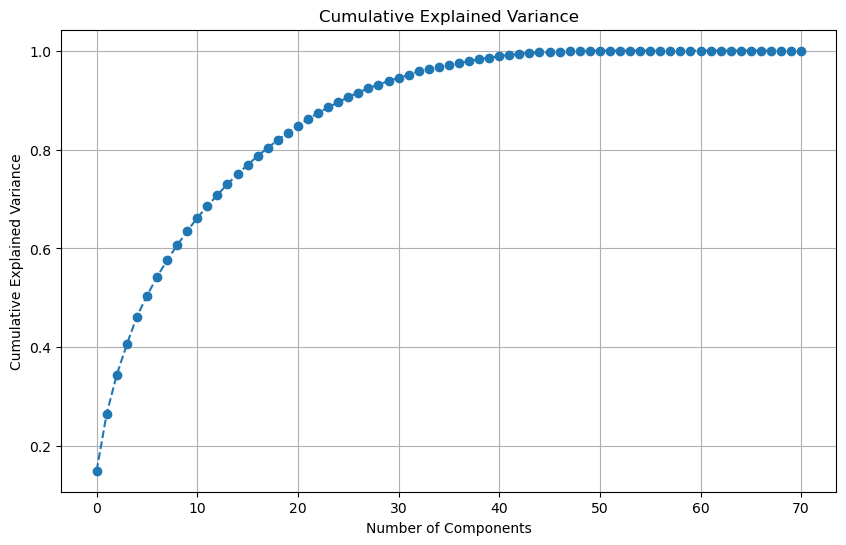

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [23]:
# find what point pca.explained_variance_ratio_.cumsum()) is greater than 0.8
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0]

25

By rule of thumb, we want to keep at least 80% of the variance. However, to be more percise, we are going to choose 25 components such that the explained variance is greater than 90%.

In [18]:
pca=PCA(n_components=25)
pca.fit(df_scaled)

PCA(n_components=25)

In [19]:
pca.transform(df_scaled)
scores_pca = pca.transform(df_scaled)

scores_pca_df = pd.DataFrame(scores_pca, columns=[f'PC{i}' for i in range(1, scores_pca.shape[1] + 1)])
scores_pca_df.to_csv('../../data/Clean_Data_project_Pub.Transport_5000/scores_pca.csv', index=False)

## t-SNE

In [2]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:

sample_1 = df.sample(n=5000)


/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


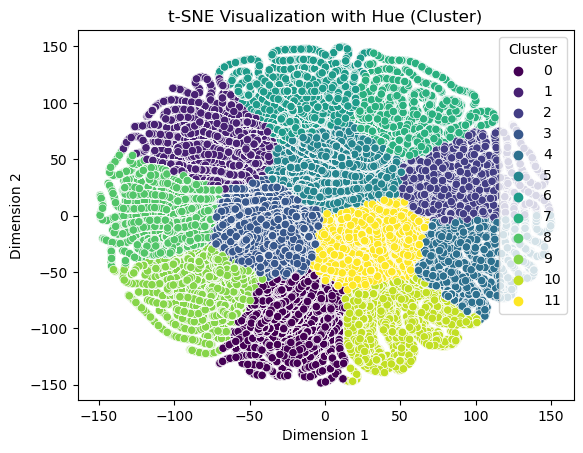

In [12]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset has features only (no labels)
X = df.iloc[:, :]

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Use KMeans to get cluster assignments
kmeans = KMeans(n_clusters=12, random_state=42)  # You can change the number of clusters as needed
clusters = kmeans.fit_predict(X_tsne)

# Create a DataFrame for the t-SNE results with cluster assignments
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

# Plot the t-SNE results with hue based on cluster
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Hue (Cluster)')
plt.show()

check perpelxity result. Or seaborn pairplot with more variables (with pca). and 3 d plots. 

/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


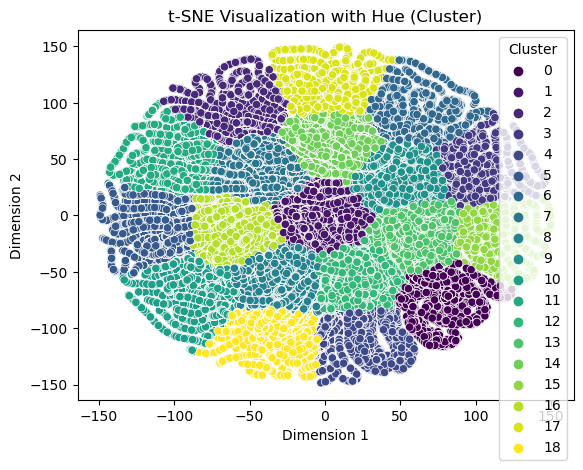

In [21]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset has features only (no labels)
X = df.iloc[:, :]

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Use KMeans to get cluster assignments
kmeans = KMeans(n_clusters=19, random_state=42)  # You can change the number of clusters as needed
clusters = kmeans.fit_predict(X_tsne)

# Create a DataFrame for the t-SNE results with cluster assignments
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

# Plot the t-SNE results with hue based on cluster
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Hue (Cluster)')
plt.show()

/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


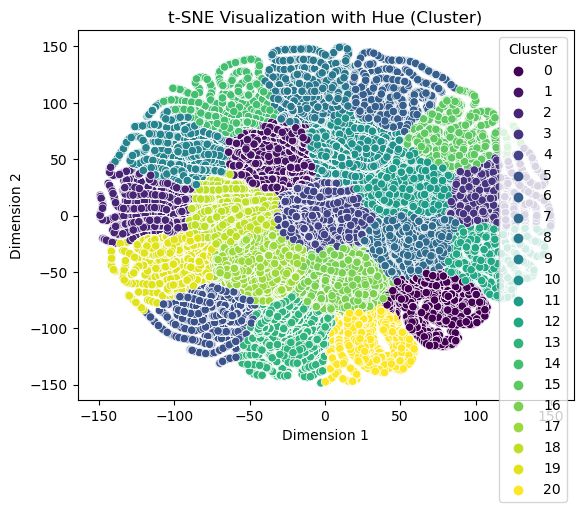

In [22]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset has features only (no labels)
X = df.iloc[:, :]

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Use KMeans to get cluster assignments
kmeans = KMeans(n_clusters=21, random_state=42)  # You can change the number of clusters as needed
clusters = kmeans.fit_predict(X_tsne)

# Create a DataFrame for the t-SNE results with cluster assignments
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

# Plot the t-SNE results with hue based on cluster
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Hue (Cluster)')
plt.show()

/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


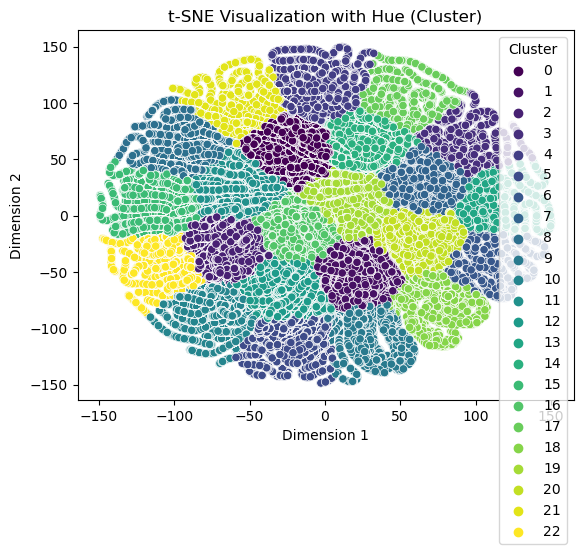

In [23]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset has features only (no labels)
X = df.iloc[:, :]

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Use KMeans to get cluster assignments
kmeans = KMeans(n_clusters=23, random_state=42)  # You can change the number of clusters as needed
clusters = kmeans.fit_predict(X_tsne)

# Create a DataFrame for the t-SNE results with cluster assignments
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

# Plot the t-SNE results with hue based on cluster
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization with Hue (Cluster)')
plt.show()